In [1]:
# First to extract data from mp3 second to play sounds from python
from pydub import AudioSegment
import os
import array
import numpy as np
import matplotlib.pyplot as plt

playsound is relying on another python subprocess. Please use `pip install pygobject` if you want playsound to run more efficiently.


In [2]:
# Load source sound

sound_dir = os.path.abspath('./audio_samples/')

A4 = AudioSegment.from_wav(os.path.join(sound_dir, 'A4_muted.wav'))

# Mutlitple channels first we split
print(A4.channels)
channels = A4.split_to_mono()
print(channels)
array_data_0 = np.array(channels[0].get_array_of_samples()).T.astype(np.float32)
array_data_1 = np.array(channels[1].get_array_of_samples()).T.astype(np.float32)

2
[<pydub.audio_segment.AudioSegment object at 0x7f6f5cc5a820>, <pydub.audio_segment.AudioSegment object at 0x7f6f5cfd45b0>]


In [5]:
fft_data_0 = np.fft.fft(array_data_0)
fft_data_1 = np.fft.fft(array_data_1)

/home/felix/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/felix/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


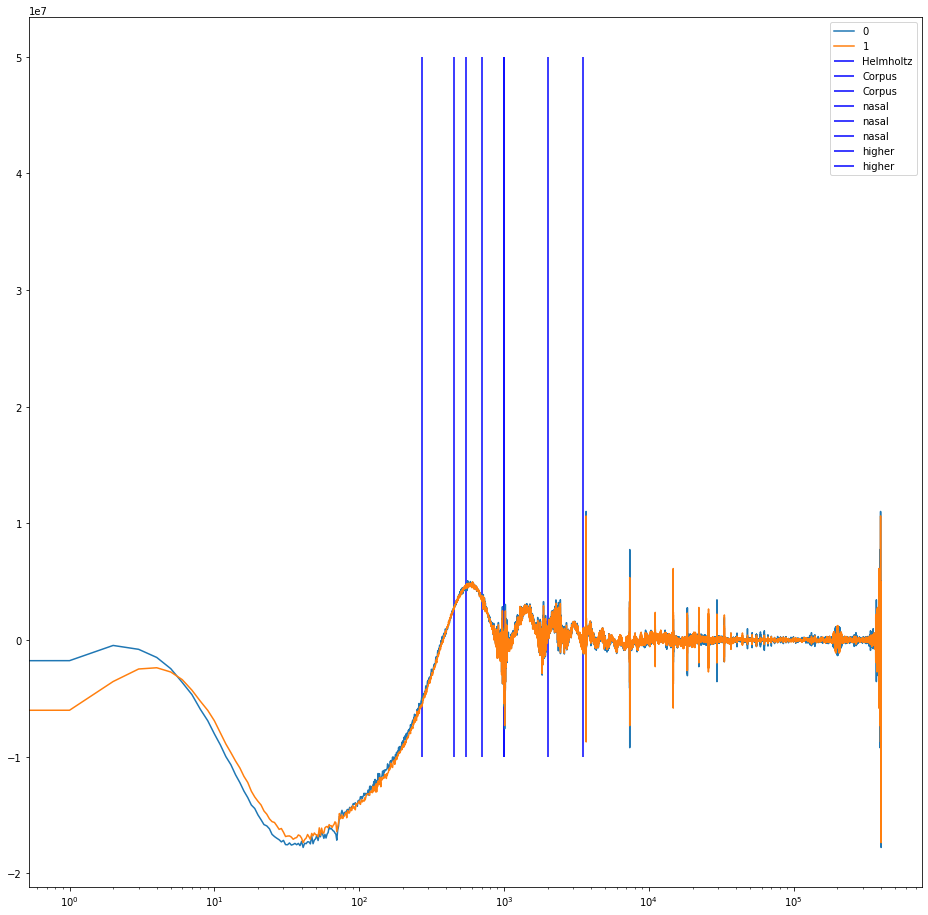

In [6]:
fig = plt.figure(figsize=(16,16))
plt.plot(fft_data_0, label='0')
plt.plot(fft_data_1, label='1')
plt.vlines(270,-1e7,5e7, color='b',label="Helmholtz")
plt.vlines(450,-1e7,5e7, color='b',label="Corpus")
plt.vlines(550,-1e7,5e7, color='b',label="Corpus")
plt.vlines(700,-1e7,5e7, color='b',label="nasal")
plt.vlines(1000,-1e7,5e7,color='b', label="nasal")
plt.vlines(1000,-1e7,5e7,color='b', label="nasal")
plt.vlines(2000,-1e7,5e7,color='b', label="higher")
plt.vlines(3500,-1e7,5e7,color='b', label="higher")
plt.xscale('log')
plt.legend()

In [7]:
# Recreate audio file rather than fft 
array_data_mod_0 = array.array(A4.array_type, np.fft.ifft(fft_data_0))
array_data_mod_1 = array.array(A4.array_type, np.fft.ifft(fft_data_1))
# Create new audio thing 
A4_mod = A4._spawn(array_data_mod_0)
# Create file
A4_mod.export(os.path.join(sound_dir, 'A4_mod.wav'), format="wav")

<ipython-input-7-c9f2eef058d0>:2: ComplexWarning: Casting complex values to real discards the imaginary part
  array_data_mod_0 = array.array(A4.array_type, np.fft.ifft(fft_data_0))
<ipython-input-7-c9f2eef058d0>:2: DeprecationWarning: an integer is required (got type numpy.complex128).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  array_data_mod_0 = array.array(A4.array_type, np.fft.ifft(fft_data_0))
<ipython-input-7-c9f2eef058d0>:3: ComplexWarning: Casting complex values to real discards the imaginary part
  array_data_mod_1 = array.array(A4.array_type, np.fft.ifft(fft_data_1))
<ipython-input-7-c9f2eef058d0>:3: DeprecationWarning: an integer is required (got type numpy.complex128).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  array_data_mod_1 = array.array(A4.array_type, np.fft.ifft(fft_data_1))


<_io.BufferedRandom name='/home/felix/music_stuff/audio_samples/A4_mod.wav'>